# 4. Woordfrequenties - hoe vaak komt een woord voor in een document of een corpus?

Welke woorden komen het meeste voor in een bepaald egodocument? De onderstaande code berekent de frequenties van alle woorden in een enkele tekst. De tekst waarin wordt gezocht wordt bepaald door de waarde van de variabele `egodocument`. De code toont vervolgens de 30 meest voorkomende woorden in deze tekst. De variabele `max` het aantal woorden dat wordt getoond. 

Ook hier is het van belang de stopwoordenlijst te gebruiken om alleen zinvolle frequenties in de resultaten terug te krijgen die te maken hebben met de inhoud, en om niet ter zake doende lidwoorden, bijwoorden en voorzetsels er uit te filteren. 

In [8]:
from kitlvTdm import *
import os
from os.path import join
import re
import pandas as pd

df = pd.DataFrame(columns = ['word','frequentie', 'total_tokens'])

max = 150 # Het maximum aantal woorden dat later wordt geprint en opgeslagen
path = 'corpus' # Het pad naar de map met de corpus
outfile = "corpus_frequency"

def sortedByValue( dict ):
    return sorted( dict , key=lambda x: dict[x], reverse = True)

# de totale frequenties worden opgeslagen in een dictionary
freqTotal = dict() 



# Hier worden het aantal woorden (tokens) en documenten bijgehouden
tokensTotal = 0
egodocuments = 0

for i, file in enumerate(os.listdir(path)):
    
    percentage_done = i / len(os.listdir(path)) * 100
    print("percentage done: {:.2f}%".format(percentage_done), end = "\r")
    
    if re.search( 'txt$' , file ):
        egodocuments += 1
        
        # bereken per woord hoe vaak het voor komt
        freq = calculateWordFrequencies( join( path, file ) )
        
        # Haal de stopwoorden eruit
        freq = removeStopwords(freq)

        for word in freq:
            if word  in freqTotal: # Als het woord al in freqTotal staat: tel extra aantal erbij op
                freqTotal[word] += freq[word]
            else: # anders, plaats het woord in freqTotal
                freqTotal[word] = freq[word]
        
        tokensTotal += numberOfTokens( join( path, file ) )

        if i > 50:
            break
            
for count, word in enumerate(sortedByValue(freqTotal)):
    print( f' { word } => { freqTotal[word] / tokensTotal }' )
    
    df = df.append({'word' : word, 'frequency' : freqTotal[word] / tokensTotal, 'total_tokens': tokensTotal}, ignore_index = True)
    
    if count == max:
        break
        
df.to_excel(f"{outfile}.xlsx")
print(f"Excel file saved as {outfile}.xlsx") 


 hier => 0.0016155093391103266
 wordt => 0.0015961265979525083
 veel => 0.0015517429297940261
 the => 0.0014180301067342946
 indië => 0.0013815118987557965
 uur => 0.001275609095618152
 goed => 0.001191055398683322
 i => 0.001188246305761899
 grote => 0.0011851563035483337
 a => 0.001114367161928476
 1 => 0.0010997598787370767
 tijd => 0.0010927371464335195
 kwam => 0.001073073495983559
 komen => 0.0010545334827021676
 terug => 0.0010286898278250767
 nederlandse => 0.0009393606729238275
 s => 0.0009306524848674164
 men => 0.0009098651972488868
 alles => 0.0008893588189224994
 ging => 0.000880369721573946
 enkele => 0.0008708188056411081
 af => 0.0008674478941354005
 nederland => 0.0008657624383825468
 jaar => 0.0008486269715618669
 jongens => 0.0008284015025276218
 heel => 0.0007710960069305941
 2 => 0.0007483423542670683
 militaire => 0.0007469378078063569
 doen => 0.0007435668963006493
 niets => 0.0007334541617835268
 zien => 0.000725026883019258
 dagen => 0.0007126668741649972
 t =>

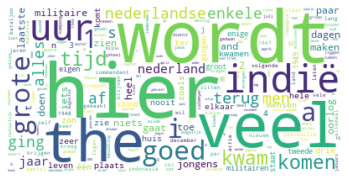

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# http://amueller.github.io/word_cloud/index.html

wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(freqTotal)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

**Oefening 4: Bepaal de meest frequente woorden in een van de egodocumenten in het corpus van "Soldaat in Indonesië". Experimenteer met verschillende waarden voor de variabelen `egodocument` en `max`.**

De woordfrequenties geven deels een vertekend beeld, omdat in veel memoires letterlijk passages of hele delen van dagboeken uit de tijd zelf worden gebruikt. Eigenlijk zou je die boeken die verhoudingsgewijze veel van deze teksten bevatten moeten kunnen isoleren, zodat de boeken zonder deze passages kunnen worden geanalyseerd. Dat kan alleen door extra codes aan de publicaties toe te voegen die dit verschil aangeeft. Die laag is er nu nog niet, maar staat wel in de planning.

Veranderingen in woordgebruik zijn gebonden aan tijd en veranderingen in de samenleving. Omdat dit corpus zich uitstrekt vanaf de periode van het conflict zelf (1945-1949) tot aan 2017, is het interessant om het voorkomen van bepaalde termen chronologisch te vergelijken. De onderstaande code verdeelt het corpus in perioden van 5 jaar, en berekent vervolgens de woordfrequenties voor de egodocumenten die in deze verschillende tijdvakken verschenen. Hierbij moet wel de kanttekening worden geplaatst dat niet alle egodocumenten konden worden gedateerd. Bij deze analyse worden de teksten die nog niet zijn gedateerd genegeerd. Verder is het uiteraard ook zo dat er een onevenredige verdeling is van het aantal boeken over deze perioden. De absolute frequenties kunnen daardoor niet zonder meer worden vergeleken. OM de frequenties toch vergelijkbaar te maken zijn de absolute tellingen steeds gedeeld door het totaal aantal woorden in de egoducmenten uit de verschillende perioden.

De lengte van de geanlyseerde periode kan overgens worden aangepast via de variabele `period_length`. 

De resultaten worden getoond in dit Notebook, maar worden eveneens weggeschreven in een bestand met de naam `frequency_chronological.csv`. 
# CSV VERANDEREN NAAR EXCEL?

In [13]:
from kitlvTdm import *
import os
from os.path import join
import re
import pandas as pd

# specificeer hier de start en eind datum om te doorzoeken
start = 1930
end = 2020

# specificeer hier de lengte van de perioden en het aantal woorden voor printen/opslaan
period_length = 5
max = 150

path = 'corpus'
outfile = f"woordfrequenties_perioden_{start}_{end}_{period_length}"

df = pd.DataFrame(columns = ["period", "word", "frequency", "total_tokens_period"])

def sortedByValue( dict ):
    return sorted( dict , key=lambda x: dict[x])

# Hier worden de verschillende tijdsperioden berekent
intervals = []
for year in range( start , end , period_length ):
    intervals.append(year)
    

for year in intervals:
    year_from = year
    year_to =  period_length - 1 + year
    freqTotal = dict()
    
    tokensTotal = 0
    egodocuments = 0

    for file in os.listdir(path):
        if re.search( 'txt$' , file ):
            year = showYear( file )
            if year != "" and len(year) == 4:
                year = int(year)
                if year >= year_from and year <= year_to:
                    egodocuments += 1
                    freq = calculateWordFrequencies( join( path, file ) )
                    
                    for word in freq:
                        if word  in freqTotal: # Als het woord al in freqTotal staat: tel extra aantal erbij op
                            freqTotal[word] += freq[word]
                        else: # anders, plaats het woord in freqTotal
                            freqTotal[word] = freq[word]
                    
                    tokensTotal += numberOfTokens( join( path, file ) )

    print( f'\n{ year_from }-{ year_to }\n{tokensTotal} words in total in {egodocuments} egodocuments\n\n' )


    freqTotal = removeStopwords( freqTotal )

    count = 0
    for word in reversed( sortedByValue(freqTotal) ):
        
        df = df.append({"period" : f"{year_from}-{year_to}", "word" : word,
                        "frequency" : freqTotal[word] / tokensTotal, 
                        "total_tokens_period": tokensTotal }, ignore_index = True)
        
        print( f' { word } => { freqTotal[word] / tokensTotal }' )
        count += 1
        if count == max:
            break

df.to_excel(f"{outfile}.xlsx")
print(f"Excel file saved as {outfile}.xlsx")


1930-1934
0 words in total in 0 egodocuments



1935-1939
243456 words in total in 3 egodocuments


 indië => 0.0028752628811777076
 hier => 0.00272739221871714
 veel => 0.0023864681913774973
 kwam => 0.0017333727655099895
 ging => 0.0015403194006309148
 tijd => 0.0014212013669821241
 s => 0.0013965562565720294
 terug => 0.0013760186645636171
 batavia => 0.0013595885909568875
 goed => 0.0013185134069400631
 jongens => 0.0012856532597266036
 bataljon => 0.0012486855941114617
 2 => 0.0012404705573080968
 paar => 0.001224040483701367
 gingen => 0.0012117179284963197
 komen => 0.0011993953732912723
 uur => 0.0011788577812828602
 nederland => 0.0011788577812828602
 grote => 0.0011706427444794954
 één => 0.0011542126708727655
 berghem => 0.0011459976340694007
 kwamen => 0.0011418901156677182
 alles => 0.0011377825972660358
 dagen => 0.0011131374868559411
 natuurlijk => 0.0011049224500525763
 dienst => 0.001084384858044164
 heel => 0.0010679547844374344
 iets => 0.0010145570452155625
 doen =


1945-1949
2694641 words in total in 55 egodocuments


 hier => 0.002035892721887628
 wordt => 0.0020195640161342456
 uur => 0.001917509605175606
 veel => 0.00162841729195095
 jongens => 0.0014732945872938175
 komen => 0.001439894961889172
 goed => 0.0012651035889381925
 grote => 0.001173440172549887
 1 => 0.0011437516166346463
 s => 0.001108496456485298
 tijd => 0.0011047853869958929
 alles => 0.0010795501144679385
 i => 0.001077694579723236
 terug => 0.0010524593071952813
 kwam => 0.0010461504890632927
 zien => 0.0010420683126249471
 men => 0.000999762120445729
 paar => 0.000998277692649967
 af => 0.0009923399814669189
 indië => 0.0009860311633349303
 t => 0.0009463227197982959
 komt => 0.0009389005808194858
 heel => 0.0009247985167597464
 doen => 0.0009144075221894123
 o => 0.0009144075221894123
 niets => 0.0008884300357635766
 gaat => 0.000884347859325231
 a => 0.0008305373517288574
 u => 0.0008264551752905118
 j => 0.0008179197154648801
 m => 0.0008075287208945458
 dagen => 0.0007

 deel => 0.00035851455469504683

1955-1959
133136 words in total in 3 egodocuments


 indië => 0.0025312462444417737
 nederlandse => 0.00201297920922966
 i => 0.0019453791611585146
 nederlanders => 0.0017200456675880303
 japanse => 0.0016900012017786324
 men => 0.0016148900372551377
 j => 0.0015848455714457398
 1 => 0.0013595120778752553
 grote => 0.0011867563994712174
 doch => 0.0011867563994712174
 bond => 0.001119156351400072
 nederland => 0.0011041341184953731
 wordt => 0.0010515563033289268
 hier => 0.000976445138805432
 leven => 0.000976445138805432
 jaar => 0.0009539117894483836
 m => 0.0009388895565436847
 land => 0.0009163562071866362
 veel => 0.0008788006249248889
 u => 0.0008788006249248889
 militaire => 0.000848756159115491
 eigen => 0.0008262228097584425
 oorlog => 0.0008036894604013941
 zeer => 0.0007886672274966952
 oorlogsslachtoffers => 0.0007511116452349478
 doen => 0.0007511116452349478
 volk => 0.0007360894123302488
 af => 0.0007360894123302488
 indonesië => 0.00072

 lang => 0.00048398576512455517
 ter => 0.00048398576512455517
 justitie => 0.00047829181494661924
 brengen => 0.00047829181494661924
 vele => 0.00047829181494661924
 eigen => 0.00047829181494661924
 zaak => 0.00047259786476868326
 gezegd => 0.00046690391459074733
 bandung => 0.00046690391459074733
 gedaan => 0.0004612099644128114
 tenslotte => 0.0004612099644128114
 goede => 0.0004555160142348754
 beklaagde => 0.0004498220640569395
 nederlanders => 0.0004498220640569395
 1946 => 0.00044412811387900357
 lag => 0.00044412811387900357
 jaren => 0.00044412811387900357
 gezien => 0.0004384341637010676
 nieuwe => 0.0004384341637010676
 darul => 0.0004384341637010676
 mogelijk => 0.00043274021352313166
 beter => 0.00043274021352313166
 geval => 0.00043274021352313166
 leven => 0.00043274021352313166
 bleef => 0.00043274021352313166
 onmiddellijk => 0.00043274021352313166
 soemenep => 0.00042704626334519574
 militaire => 0.00042704626334519574
 gingen => 0.00042704626334519574
 3 => 0.0004270

 r => 0.000472380628138565
 mensen => 0.0004681249468039833
 1948 => 0.00046386926546940167
 o => 0.00046386926546940167
 gemaakt => 0.00046386926546940167
 zien => 0.00045961358413482
 jappen => 0.00045961358413482
 staat => 0.00045961358413482
 o.a => 0.00045961358413482
 1949 => 0.00045961358413482
 makassar => 0.0004553579028002383
 werk => 0.0004511022214656567
 kolonel => 0.0004511022214656567
 soerabaja => 0.00043833517746191163
 kwamen => 0.00043833517746191163
 vele => 0.00043833517746191163
 8 => 0.00043833517746191163
 bataljon => 0.00043407949612733
 waarvan => 0.00043407949612733
 lt => 0.0004298238147927483
 kreeg => 0.0004298238147927483
 groot => 0.0004298238147927483
 m.i.v => 0.00042556813345816664
 le => 0.000421312452123585
 zon => 0.000421312452123585
 regering => 0.000421312452123585
 ri => 0.00041705677078900333
 stormers => 0.00041280108945442165
 compagnie => 0.00041280108945442165
 zeer => 0.00041280108945442165
 weinig => 0.00041280108945442165
 zeggen => 0.0

 militairen => 0.00046149507311278424
 lang => 0.00046042679748057875
 batavia => 0.00045615369495175667
 december => 0.00045294886805514014
 groep => 0.00045241473023903737
 groot => 0.0004502781789746263
 r => 0.00044974404115852355
 actie => 0.0004481416277102153
 laten => 0.00044333438736529043
 zelf => 0.0004401295604686739
 p => 0.00043799300920426286
 6 => 0.0004374588713881601
 nieuwe => 0.00043425404449154355
 nacht => 0.00043265163104323523
 keer => 0.0004289126663305159
 w => 0.0004267761150661049
 dienst => 0.0004262419772500021
 blijven => 0.0004251737016177966
 10 => 0.0004230371503533856
 f => 0.0004225030125372828
 kampong => 0.0004187640478245635
 vuur => 0.00041288853184743315
 8 => 0.0004112861183991249
 erg => 0.0004086154293186111
 d => 0.00040754715368640553
 kregen => 0.00040647887805420003
 1947 => 0.00040487646460589177
 per => 0.000404342326789789
 trein => 0.0004006033620770697
 aantal => 0.0004000692242609669
 gebied => 0.00039953508644486414
 richting => 0.

 n => 0.0004952414012554601
 groot => 0.0004952414012554601
 indonesische => 0.0004929271891000608
 jap => 0.0004917700830223611
 zat => 0.00048714165871156236
 u => 0.00048482744655616304
 compagnie => 0.00048367034047846336
 luitenant => 0.00048251323440076367
 1947 => 0.00047557059793456566
 java => 0.00047557059793456566
 werk => 0.00047557059793456566
 vader => 0.00047441349185686597
 volgende => 0.0004663137493129683
 staat => 0.0004651566432352686
 enige => 0.0004651566432352686
 wilde => 0.0004639995371575689
 zag => 0.00046284243107986927
 mm => 0.0004616853250021696
 gemaakt => 0.0004605282189244699
 laten => 0.0004570569006913709
 1946 => 0.0004558997946136712
 3 => 0.0004547426885359715
 nederlanders => 0.0004524284763805722
 december => 0.0004501142642251728
 lang => 0.0004466429459920738
 zeer => 0.0004466429459920738
 staan => 0.00044085741560357544
 deel => 0.0004397003095258758
 1948 => 0.0004385432034481761
 7 => 0.00043622899129277674
 mn => 0.0004339147791373774
 ve

 komt => 0.0005093886116567636
 lang => 0.0005093886116567636
 gebied => 0.000500237918034187
 politionele => 0.0004941374556191359
 6 => 0.0004910872244116104
 toe => 0.00048803699320408485
 deel => 0.00048498676199655935
 menado => 0.0004819365307890338
 patrouille => 0.0004788862995815083
 lag => 0.00047583606837398273
 dienst => 0.00047583606837398273
 oorlog => 0.0004697356059589317
 weet => 0.00046668537475140617
 allemaal => 0.00046668537475140617
 leger => 0.0004636351435438806
 stad => 0.0004605849123363551
 blijven => 0.0004605849123363551
 batavia => 0.00045753468112882955
 wil => 0.00045448444992130405
 a => 0.0004514342187137785
 zitten => 0.0004514342187137785
 indonesische => 0.000448383987506253
 veteranen => 0.00044533375629872743
 maanden => 0.00044533375629872743
 nieuwe => 0.00044533375629872743
 januari => 0.0004392332938836764
 april => 0.0004392332938836764
 bleek => 0.00043618306267615087
 gemaakt => 0.00043618306267615087
 weten => 0.00043618306267615087
 één =

 weet => 0.0005539859287574095
 doet => 0.0005539859287574095
 10 => 0.0005539859287574095
 soms => 0.0005539859287574095
 uur => 0.0005539859287574095
 soekaboemi => 0.0005429062101822614
 troepen => 0.0005429062101822614
 9 => 0.0005429062101822614
 repatriëring => 0.0005318264916071132
 werk => 0.0005318264916071132
 25 => 0.000520746773031965
 compagnie => 0.000520746773031965
 laat => 0.000520746773031965
 waarin => 0.000520746773031965
 15 => 0.000520746773031965
 opgericht => 0.0005096670544568168
 17 => 0.0005096670544568168
 dick => 0.0005096670544568168
 8 => 0.0005096670544568168
 21 => 0.0004985873358816686
 infanterie => 0.0004985873358816686
 hoofdstuk => 0.0004985873358816686
 begin => 0.0004985873358816686
 reis => 0.0004875076173065204
 militaire => 0.0004875076173065204
 grote => 0.0004764278987313722
 boord => 0.000465348180156224
 doen => 0.000465348180156224
 stoottroepen => 0.000465348180156224
 padang => 0.00045426846158107585
 oorlog => 0.00045426846158107585
 d

**Oefening 4: Probeer met behulp van de bovenstaande code te verkennen hoe het woordgebruik zich ontwikkelde over de loop van de afgelopen decennia. Verander hiervoor de waarde van de variabelen `period_length` en `nr_words`.**

Woordsoorten als zelfstandige naamwoorden, bijvoeglijke naamwoorden en werkwoorden drukken zijn over het algemeen het meest bepalend voor de betekenis van zinnen. Het kan daarom nuttig en informatief zijn om frequentie-analyses te beperken tot dit soort woorden. In de onderstaande cellen worden uitsluitend de zelfstandige naamwoorden, bijvoeglijke naamwoorden en werkwoorden geteld, door gebruik te maken van de hierboven al genoemde module `nltk`. Deze module richt zich normaal gesproken op Engelstalige teksten. Om `nltk` ook toe te kunnen passen op Nederlandstalige teksten moet eerst de onderstaande code worden uitgevoerd. 

In [6]:
import nltk
nltk.download('alpino')

from nltk.corpus import alpino as alp
from nltk.tag import UnigramTagger, BigramTagger
training_corpus = alp.tagged_sents()
unitagger = UnigramTagger(training_corpus)
bitagger = BigramTagger(training_corpus, backoff=unitagger)
pos_tag = bitagger.tag

[nltk_data] Downloading package alpino to
[nltk_data]     C:\Users\Gebruiker\AppData\Roaming\nltk_data...
[nltk_data]   Package alpino is already up-to-date!


Als de installatie van de Nederlandstalige variant van `nltk` geen problemen opleverde, kan de onderstaande, meer gerichte frequentie-analyse worden uitgevoerd. Let er hierbij op dat het toekennen van grammaticale categorieën wel enige rekenkracht vergt. Het uitvoeren van de code kan dus enige tijd in beslag nemen.  

In [13]:
from kitlvTdm import *
import os
from os.path import join
from nltk.tokenize import sent_tokenize, word_tokenize

nr_words = 100

path = 'corpus'
egodocument = '03391.txt'

def sortedByValue( dict ):
    return sorted( dict , key=lambda x: dict[x])



out = open( 'frequency_POS.csv' , 'w' , encoding = 'utf-8' )
out.write( 'word,frequency\n' )



freqTotal = dict()

countFile = 0 

for file in os.listdir(path):
    if re.search( 'txt$' , file ):
        countFile += 1
        if file == egodocument:
        #print( '\rReading {} ... ({}/577)'.format(file , countFile ) )
            with open( join( path, file )) as fileName:
                print(fileName)
                fullText = fileName.read()
                sent = sent_tokenize(fullText)
                for s in sent:
                    words = word_tokenize(s)
                    pos = pos_tag(words)
                    for p in pos:
                        if p[1] is not None:
                            if re.search( r'^(adj)|(noun)|(verb)' , p[1] ):
                                freqTotal[ p[0]  ] = freqTotal.get( p[0] ,0 ) + 1


freqTotal = removeStopwords( freqTotal )

for word in reversed( sortedByValue(freqTotal) ):
    out.write( f'{word},{freqTotal[word]}\n' )
    print( f' { word } => { freqTotal[word] / tokensTotal }' )
    count += 1
    if count == nr_words:
        break

out.close()

<_io.TextIOWrapper name='corpus\\03391.txt' mode='r' encoding='cp1252'>


UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 64585: character maps to <undefined>

**Oefening 5: Probeer een lijst te generen van de 150 meest frequente zelfstandige naamwoorden, bijvoeglijke naamwoorden en werkwoorden.**